In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
# test size 는 default 로 0.25
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# 이 역시 valid size 는 defaualt 로 0.25

# X data scaling
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)
X_new = X_test[:3]

# 함수형 API

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) 
# test size 는 default 로 0.25
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# 이 역시 valid size 는 defaualt 로 0.25

In [15]:
# X data scaling
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid) 
X_test = scaler.transform(X_test)

In [16]:
np.random.seed(42)
tf.random.set_seed(42) # random 고정

## 지름길이 있는 model

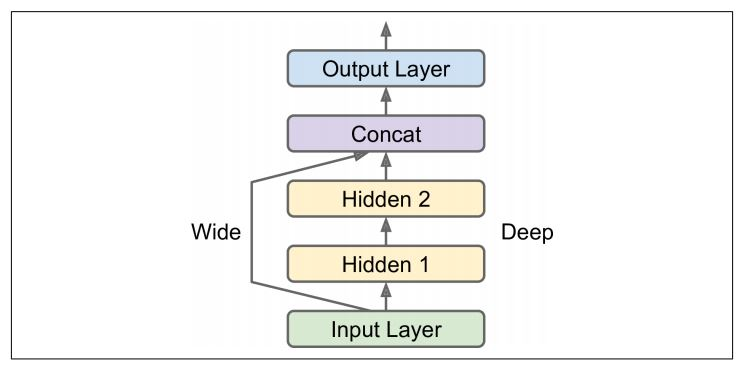

In [17]:
Image("C:/Users/goran/Desktop/Python/Images/keras1.jpg") 

In [18]:
input_ = keras.layers.Input(shape=X_train.shape[1:]) 
# input 객체를 만들어야 한다. 이 객체는 shape / dtype 을 포함해서 모델의 입력을 정의합니다.
hidden1 = keras.layers.Dense(30,activation="relu")(input_) # 옆의 () 는 input 을 어떤것을 받느냐이다.
# layer 들을 형성합니다. 
# 이 층은 만들어지자 마자 입력과 함께 함수처럼 호출됩니다. (input_) 이 옆에 붙어있음. 그래서 함수형 api 라고 한다.
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
# 두번쨰 hidden layer 를 형성합니다. 
concat = keras.layers.concatenate([input_, hidden2])
# concatenate 층을 만들고 또 다시 함수처럼 호출하여 두번쨰 은닉층의 출력과, 처음의 입력을 연결합니다.
output = keras.layers.Dense(1)(concat) 
# 하나의 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 활용해 호출합니다.
model = keras.models.Model(inputs=[input_], outputs=[output]) # 마지막 모델에서는 input / output 을 모두 표시해준다.
# 마지막으로 사용할 입력과 출력을 지정해 케라스 model 을 만듭니다.

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

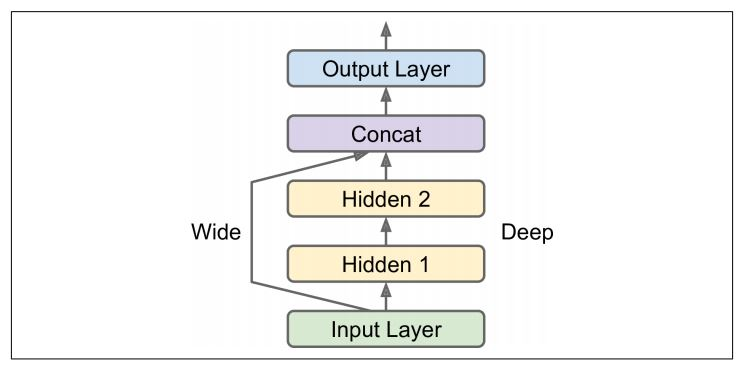

In [20]:
Image("C:/Users/goran/Desktop/Python/Images/keras1.jpg") 

In [21]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 54us/sample - loss: 1.2390 - val_loss: 0.6566
Epoch 2/3
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6312 - val_loss: 0.6734
Epoch 3/3
5160/5160 [==============================] - 0s 16us/sample - loss: 0.5637


와이드나 딥 경로에 다른 입력 특성을 전달하면 어떻게 될까요? (특성 0에서 4까지) 5개의 특성을 와이드 경로에 보내고 (특성 2에서 7까지) 6개의 특성을 딥 경로에 전달하겠습니다. 3개의 특성(특성 2, 3, 4)은 양쪽에 모두 전달됩니다.

## 입력층이 여러개인 model

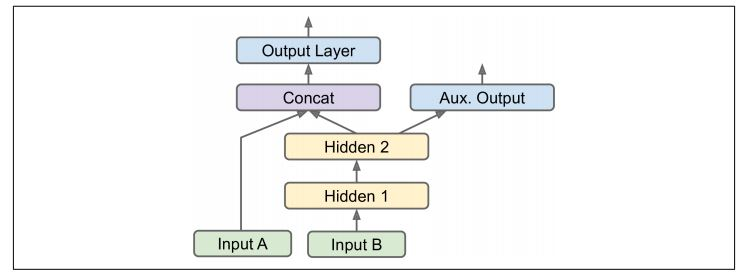

In [22]:
Image("C:/Users/goran/Desktop/Python/Images/keras2.jpg") 

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
input_A = keras.layers.Input(shape=[5], name="wide_input") 
# name 은 이름을 붙여주는 것이다. 모델이 복잡해지면, 가장 중요한 층에는 이름을 붙여주는것이 나중에 해석할떄에 용이하다.
# input A 의 input 특성은 5개인 1dim vector 
input_B = keras.layers.Input(shape=[6], name="deep_input")
# imput B 의 input 특성은 6개인 1dim vector
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [25]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=3,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
# fit 과정에서 X_train 부분이 2dim 의 tuple 로 대체되었음을 기억하자.
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 49us/sample - loss: 1.8127 - val_loss: 2.1165
Epoch 2/3
11610/11610 [==============================] - 0s 28us/sample - loss: 0.6852 - val_loss: 0.6178
Epoch 3/3
5160/5160 [==============================] - 0s 15us/sample - loss: 0.5635


## 출력층에 여러개인 model

- 여려 출력이 필요한 작업일떄 사용. 예를 들어 그림에 있는 주요 물체를 분류하고 위치를 알고싶을떄에 회귀작업(물체의 위치) + 분류작업(물체의 종류) 를 동시에 해야되기 떄문에 출력층이 여러개가 필요하다
- 동일한 데이터에서 독립적인 여러작업을 수행할때에. 예를 들어서 사람 얼굴 데이터에서 행복/슬픔 분류와 안경 썻는지의 유무 분류를 동시에 하고싶다고 하자. 두 작업을 따로따로 다른 신경망을 이용해서 학습시킬 수 있지만, 보통 작업마다 하나의 출력을 가진 단일 신경망을 훈련시키는것이 보통 더 나은 결과를 낸다고 한다. 
- 규제기법으로 사용 가능하다.(과대적합을 피하기 위해) 예를 들어 신경망 구조 안에 보조출력을 아래 그림처럼 추가할 수 있다. 보조출력을 사용해 하위 네트워크가 나머지 네트워크에 의존하지 않고 그 자체로 유용한것을 학습하는지 확인할 수 있다.

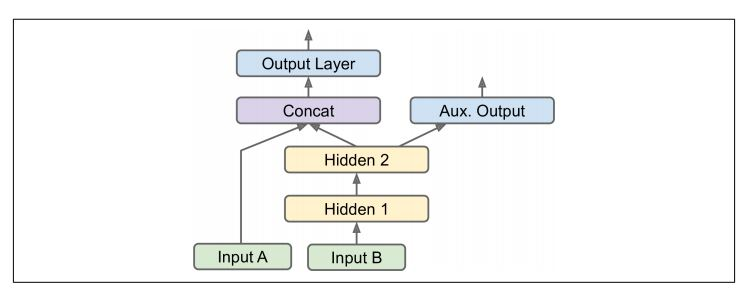

In [26]:
Image("C:/Users/goran/Desktop/Python/Images/keras3.jpg") 

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [29]:
model.compile(loss=["mse", "mse"],  # output 이 둘다 regression 인 loss 이므로 mse
              loss_weights=[0.9, 0.1],  # output 이 2개이므로 각 가중치 결정. 이떄는 aux_output 보다 output 을 중시하는듯!
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [30]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=3,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 71us/sample - loss: 2.1346 - main_output_loss: 1.9194 - aux_output_loss: 4.0632 - val_loss: 2.9120 - val_main_output_loss: 2.2555 - val_aux_output_loss: 8.8088
Epoch 2/3
11610/11610 [==============================] - 0s 33us/sample - loss: 0.8954 - main_output_loss: 0.7048 - aux_output_loss: 2.6119 - val_loss: 1.4135 - val_main_output_loss: 0.6348 - val_aux_output_loss: 8.4172
Epoch 3/3
11610/11610 [==============================] - 0s 34us/sample - loss: 0.7400 - main_output_loss: 0.6077 - aux_output_loss: 1.9305 - val_loss: 1.3594 - val_main_output_loss: 0.5885 - val_aux_output_loss: 8.2925


In [31]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/5160 [==============================] - 0s 17us/sample - loss: 0.6858 - main_output_loss: 0.5742 - aux_output_loss: 1.7123


# 서브클래스 API

In [32]:
class WideAndDeepModel(keras.models.Model): #keras.models.Model 이 부모class
    def __init__(self, units=30, activation="relu", **kwargs):  
        # self, units=30, activation='relu' 를 defaut 값으로 하고, tuning 자유롭게 가능.
        # 뒤의 **kwargs 는 표준 매개변수(name 등) 을 처리
        # 여기에다가 다 쓰기에는 너무 많으니까 그냥 모든 a=k 형태의 값을 dic 형태로 바꾸어 저장하는 **kwargs 를 형성한다.
        super().__init__(**kwargs)
        # 앞에서 받은 name= 'go' 같은 형태의 값들은 부모 class 에서 attribute 가 정의가 되고있기 떄문에 super 를 써서 부모클래스를 참조해 attribute 를 형성하자.
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        # attribute 형성
        
    def call(self, inputs): 
        # method 를 형성하자. # call 이라고 method 를 형성하면 이 call 메소드에서의 모양으로 wideanddeepmodel 이 형성되는 모양이다.
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [33]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=3,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 75us/sample - loss: 2.2719 - output_1_loss: 2.1554 - output_2_loss: 3.3117 - val_loss: 4.3377 - val_output_1_loss: 2.7732 - val_output_2_loss: 18.3999
Epoch 2/3
11610/11610 [==============================] - 0s 31us/sample - loss: 0.9891 - output_1_loss: 0.8653 - output_2_loss: 2.1062 - val_loss: 2.0073 - val_output_1_loss: 0.7581 - val_output_2_loss: 13.2427
Epoch 3/3
5160/5160 [==============================] - 0s 23us/sample - loss: 0.7721 - output_1_loss: 0.6848 - output_2_loss: 1.5847


- call method 안에서 원하는 많은 계산을 할 수 있다. 그래서 새로운 아이디어를 실험하는 연구자들에게 매우 잘 맞는다.
- 유연성은 높지만, 모델구조가 call 메서드 안에숨겨져 있어서 keras 가 쉽게 이를 분석할 수 없다. 즉 모델을 저장/복사가 힘들고 summary 메서드를 써도 층의 연결목록만 나열되고 연결정보를 얻을 수 없다. 케라스가 타입과 크기를 확인할 수 없어 실수가 발생하기 쉽다.
- 우리는 그냥 함수혐 API처럼 MODEL 을 직접 쌓는게 제일 좋은듯하다.

# 저장과 복원

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=3, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 46us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/3
11610/11610 [==============================] - 0s 29us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/3
5160/5160 [==============================] - 0s 16us/sample - loss: 0.5606


## 저장

In [37]:
model.save("my_keras_model.h5") 
# 모델을 세이브한다.
# h5 의 확장자를 가진 모델이 저장되었음을 확인할 수 있다.

## 불러오기

In [38]:
model = keras.models.load_model("my_keras_model.h5")
# 같은 경로에 있는 모델을 import 한다. my_keras_model.h5 는 이미 train 이 되어있는 상태라 그냥 model load 만 하고 쓰면 된다.

In [39]:
model.predict(X_new)

array([[0.8117067],
       [1.3380315],
       [2.4538584]], dtype=float32)

# callback

## checkpoint

callback 은 제일 좋을떄의 model 을 저장하는 함수이다. <br>
즉 굳이 val 의 함수를 보고/ 과적합이였는지 다시 조사한 후에 epoch 를 조정할 필요가 없어 효율적.

In [40]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [42]:
# call back 사용하기
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3)) #모델 컴파일
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", #저장할 모델 이름
                                                monitor = 'val_loss', #monitoring 할 기준
                                                save_best_only=True) 
# save_best_only : 모델의 정확도가 최고값을 갱신했을 때만 저장하도록 하자.
# monitor 할 값은 validation loss (이떄에는 val loss 가 최고 낮을떄에 저장을 하게 될 것이다!)
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    #validation_split = 0.2 으로 사용해도 된다. 어짜피 validation 쓰는것은 똑같기떄문에
                    callbacks=[checkpoint_cb]) # callback 에 checkpont 값을 넣어준다.
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 롤백
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 48us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/3
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/3
5160/5160 [==============================] - 0s 23us/sample - loss: 0.5606


## Early Stopping

정해진 기준에 미달일경우 학습을 종료한다.

In [44]:
#조기종료
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, #2 만 줘보자.
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb]) 
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.4197 - val_loss: 0.4015
Epoch 2/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4153 - val_loss: 0.3954
Epoch 3/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4108 - val_loss: 0.3844
Epoch 4/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4070 - val_loss: 0.3818
Epoch 5/100
11610/11610 [==============================] - 0s 30us/sample - loss: 0.4034 - val_loss: 0.3806
Epoch 6/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.4002 - val_loss: 0.3838
Epoch 7/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3972 - val_loss: 0.3725
Epoch 8/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3945 - val_loss: 0.3702
Epoch 9/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.391

In [45]:
# 딱 훈련이 위에서 빨리 멈춘것을 볼 수 있다.
mse_test

0.3775634096574414

In [46]:
# 사용자 지정 콜백 (생략)
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [47]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
 9792/11610 [========================>.....] - ETA: 0s - loss: 0.3715
val/train: 0.95
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3781 - val_loss: 0.3594


## Tensorboard

In [48]:
import os 
root_logdir = os.path.join(os.curdir, "my_logs") 
# 현재 경로에서 새로운 폴더 만들어서 저장
# os.path.join (a,b) = a/b 로 경로를 합치는것
# os.curdir() - 현재 디렉토리 얻기 , 그 옆에 my_logs 를 추가해서 새로운 파일이 생김을 알 수 있다.

In [49]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S") # time 객체를 어떤 형식으로 저장할지 형식
    return os.path.join(root_logdir, run_id) 

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_07_16-16_37_33'

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [52]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 53us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/3
11610/11610 [==============================] - 0s 35us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/3
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5954 - val_loss: 0.5446


텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

그다음 웹 브라우저를 열고 [localhost:6006](http://localhost:6006)에 접속하면 텐서보드를 사용할 수 있습니다. 사용이 끝나면 터미널에서 Ctrl-C를 눌러 텐서보드 서버를 종료하세요.

또는 다음처럼 텐서보드의 주피터 확장을 사용할 수 있습니다(이 명령은 텐서보드가 로컬 컴퓨터에 설치되어 있어야 합니다):

In [53]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 15884), started 1 day, 18:00:34 ago. (Use '!kill 15884' to kill it.)

In [54]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2020_07_16-16_38_02'

In [55]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [57]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=3,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 51us/sample - loss: 5.6341 - val_loss: 1.3205
Epoch 2/3
11610/11610 [==============================] - 0s 32us/sample - loss: 1.2704 - val_loss: 1.0757
Epoch 3/3
11610/11610 [==============================] - 1s 48us/sample - loss: 0.9370 - val_loss: 0.7769


텐서보드에 실행 결과가 2개 있습니다. 학습 곡선을 비교해 보세요.

사용할 수 있는 로깅 옵션을 확인해 보죠:

In [58]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# 하이퍼파라미터 튜닝

In [59]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
# 이건 새로 만들자. 별로 안좋네.
# Hyperopt 
# keras tuner 
# scikitlearn 뭐 할지는 알아서... 나는 keras tuner 가 구글서 만들었으니까 좀더 좋지안을까>./

# Activation function

## LeakyReLU

LeakyReLU를 사용해 패션 MNIST에서 신경망을 훈련해 보죠:

In [61]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

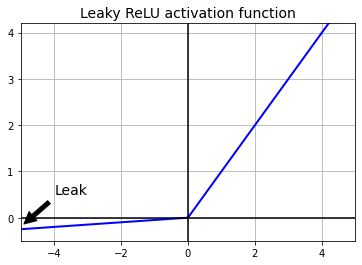

In [62]:
z = np.linspace(-5, 5, 200)
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [68]:
y_test.shape

(10000,)

In [69]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
# 0 ~ 255 값 스테일링
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

#데이터가 너무 많아서 컴퓨터가 안돌아가므로 1~1000 을 valset/ 1000~4000 을 train set으로 지정하자.
X_test, y_test = X_test[:500], y_test[:500]
X_valid, X_train = X_train_full[:1000], X_train_full[1000:4000]
y_valid, y_train = y_train_full[:1000], y_train_full[1000:4000]

In [70]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    # 처음층은 Flatten
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    # initial weight activation 을 LeakyRelu 를 쓰기위해 weight 를 초기화 하는 방법으로 he_normal 을 쓴다.
    # 이 kernel initializer 가 초기화하는 부분은 노드 전에 이어져있는 부분이다. -(이부분의 w)- node --
    keras.layers.LeakyReLU(),
    # default 로 LeakyRelu 의 a 값은 0.3 이다.
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax") 
    # softmax activation 을 쓰므로 굳이 initializier 를 쓰지는 않는다.
])

In [71]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [77]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 0s 67us/sample - loss: 1.1635 - accuracy: 0.6757 - val_loss: 1.1418 - val_accuracy: 0.6940
Epoch 2/10
3000/3000 [==============================] - 0s 60us/sample - loss: 1.1213 - accuracy: 0.6803 - val_loss: 1.1026 - val_accuracy: 0.6960
Epoch 3/10
3000/3000 [==============================] - 0s 65us/sample - loss: 1.0835 - accuracy: 0.6853 - val_loss: 1.0682 - val_accuracy: 0.7010
Epoch 4/10
3000/3000 [==============================] - 0s 72us/sample - loss: 1.0502 - accuracy: 0.6917 - val_loss: 1.0378 - val_accuracy: 0.7010
Epoch 5/10
3000/3000 [==============================] - 0s 66us/sample - loss: 1.0204 - accuracy: 0.6960 - val_loss: 1.0086 - val_accuracy: 0.7080
Epoch 6/10
3000/3000 [==============================] - 0s 75us/sample - loss: 0.9934 - accuracy: 0.7007 - val_loss: 0.9831 - val_accuracy: 0.7140
Epoch 7/10
3000/3000 [==============================] - 0s 63us/sample

## PReLU

In [126]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [127]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [128]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 1s 174us/sample - loss: 2.2346 - accuracy: 0.1893 - val_loss: 2.0760 - val_accuracy: 0.3060
Epoch 2/10
3000/3000 [==============================] - 0s 66us/sample - loss: 1.9805 - accuracy: 0.3833 - val_loss: 1.8882 - val_accuracy: 0.4530
Epoch 3/10
3000/3000 [==============================] - 0s 63us/sample - loss: 1.8170 - accuracy: 0.5010 - val_loss: 1.7487 - val_accuracy: 0.5710
Epoch 4/10
3000/3000 [==============================] - 0s 66us/sample - loss: 1.6883 - accuracy: 0.5857 - val_loss: 1.6322 - val_accuracy: 0.6100
Epoch 5/10
3000/3000 [==============================] - 0s 66us/sample - loss: 1.5790 - accuracy: 0.6207 - val_loss: 1.5297 - val_accuracy: 0.6520
Epoch 6/10
3000/3000 [==============================] - 0s 67us/sample - loss: 1.4836 - accuracy: 0.6420 - val_loss: 1.4396 - val_accuracy: 0.6620
Epoch 7/10
3000/3000 [==============================] - 0s 63us/sampl

## ELU

In [81]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

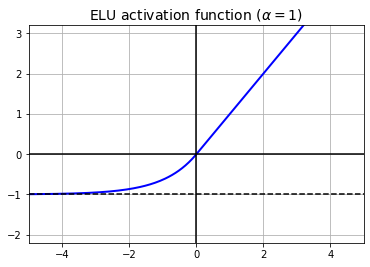

In [82]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

텐서플로에서 쉽게 ELU를 적용할 수 있습니다. 층을 만들 때 활성화 함수로 지정하면 됩니다:

## SELU

Günter Klambauer, Thomas Unterthiner, Andreas Mayr는 2017년 한 [훌륭한 논문](https://arxiv.org/pdf/1706.02515.pdf)에서 SELU 활성화 함수를 소개했습니다. 훈련하는 동안 완전 연결 층만 쌓아서 신경망을 만들고 SELU 활성화 함수와 LeCun 초기화를 사용한다면 자기 정규화됩니다. 각 층의 출력이 평균과
표준편차를 보존하는 경향이 있습니다. 이는 그레이디언트 소실과 폭주 문제를 막아줍니다. 그 결과로 SELU 활성화 함수는 이런 종류의 네트워크(특히 아주 깊은 네트워크)에서 다른 활성화 함수보다 뛰어난 성능을 종종 냅니다. 따라서 꼭 시도해 봐야 합니다. 하지만 SELU 활성화 함수의 자기 정규화 특징은 쉽게 깨집니다. ℓ<sub>1</sub>나 ℓ<sub>2</sub> 정규화, 드롭아웃, 맥스 노름, 스킵 연결이나 시퀀셜하지 않은 다른 토폴로지를 사용할 수 없습니다(즉 순환 신경망은 자기 정규화되지 않습니다). 하지만 실전에서 시퀀셜 CNN과 잘 동작합니다. 자기 정규화가 깨지면 SELU가 다른 활성화 함수보다 더 나은 성능을 내지 않을 것입니다.

In [83]:
from scipy.special import erfc

# alpha와 scale은 평균 0과 표준 편차 1로 자기 정규화합니다
# (논문에 있는 식 14 참조):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [84]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

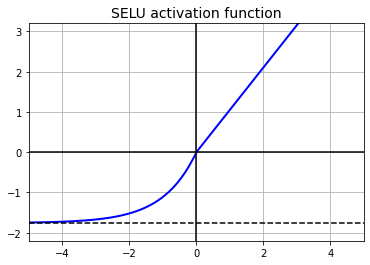

In [85]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])
plt.show()

기본적으로 SELU 하이퍼파라미터(`scale`과 `alpha`)는 각 뉴런의 평균 출력이 0에 가깝고 표준 편차는 1에 가깝도록 조정됩니다(입력은 평균이 0이고 표준 편차 1로 표준화되었다고 가정합니다). 이 활성화 함수를 사용하면 1,000개의 층이 있는 심층 신경망도 모든 층에 걸쳐 거의 평균이 0이고 표준 편차를 1로 유지합니다. 이를 통해 그레이디언트 폭주와 소실 문제를 피할 수 있습니다:

In [86]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # 표준화된 입력
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun 초기화
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


쉽게 SELU를 사용할 수 있습니다:

In [87]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

100개의 은닉층과 SELU 활성화 함수를 사용한 패션 MNIST를 위한 신경망을 만들어 보죠:

In [142]:
np.random.seed(42)
tf.random.set_seed(42)

In [143]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    # layer 변수는 없지만 그냥 99번 반복한다는 의미로 for 문을 쓴것.
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [144]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

이제 훈련해 보죠. 입력을 평균 0과 표준 편차 1로 바꾸어야 한다는 것을 잊지 마세요 !!!!!!!!!!!!! 

In [145]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds=X_train.std(axis=0, keepdims=True)[(X_train.std(axis=0, keepdims=True)==0)] = 1 # 분산이 0 일때에는 1을 내놓자. 안그러면 nan 이 되어버림.
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [147]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/5
3000/3000 [==============================] - 4s 1ms/sample - loss: 2.0391 - accuracy: 0.2573 - val_loss: 1.9606 - val_accuracy: 0.2490
Epoch 2/5
3000/3000 [==============================] - 1s 392us/sample - loss: 1.6295 - accuracy: 0.3330 - val_loss: 1.6291 - val_accuracy: 0.3250
Epoch 3/5
3000/3000 [==============================] - 1s 381us/sample - loss: 1.4285 - accuracy: 0.4057 - val_loss: 1.4135 - val_accuracy: 0.4280
Epoch 4/5
3000/3000 [==============================] - 1s 386us/sample - loss: 1.2665 - accuracy: 0.4803 - val_loss: 1.3919 - val_accuracy: 0.4560
Epoch 5/5
3000/3000 [==============================] - 1s 384us/sample - loss: 1.1705 - accuracy: 0.5537 - val_loss: 1.1476 - val_accuracy: 0.5720


대신 ReLU 활성화 함수를 사용하면 어떤 일이 일어나는지 확인해 보죠:

In [148]:
np.random.seed(42)
tf.random.set_seed(42)

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [150]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [151]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/5
3000/3000 [==============================] - 3s 1ms/sample - loss: 2.3064 - accuracy: 0.0990 - val_loss: 2.3015 - val_accuracy: 0.0960
Epoch 2/5
3000/3000 [==============================] - 1s 329us/sample - loss: 2.2938 - accuracy: 0.1103 - val_loss: 2.2877 - val_accuracy: 0.1160
Epoch 3/5
3000/3000 [==============================] - 1s 332us/sample - loss: 2.2549 - accuracy: 0.1453 - val_loss: 2.2215 - val_accuracy: 0.1540
Epoch 4/5
3000/3000 [==============================] - 1s 327us/sample - loss: 2.1793 - accuracy: 0.2170 - val_loss: 2.1556 - val_accuracy: 0.2260
Epoch 5/5
3000/3000 [==============================] - 1s 336us/sample - loss: 2.1303 - accuracy: 0.2443 - val_loss: 2.1304 - val_accuracy: 0.2210


좋지 않군요. 그레이디언트 폭주나 소실 문제가 발생한 것입니다.

# BatchNormalization

In [152]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(), 
    #배치 정규화.주로 활성화 함수를 통과하기 전에 실행한다. 즉 먼저 normalization 을 실행한 후에 activation 을 실행해야하므로, act 전에 batch normal 층이 들어간다.
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [153]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_319 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_320 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_321 (Dense)            (None, 10)               

In [154]:
# model 의 summary 를 보면 알 수 있듯이 배치 정규화 층은 입력마다 네개의 파라미터 (r,beta) = (shift와 scale 조정) ,u,sigma(정규화시 추정한 batch 의 평균값) 를 추가합니다.
# 하지만 이떄 u,sigma 는 back propagation 떄 학습을 안하고 그냥 정규화만 시키는 값이므로 맨 아래에 non-trained params 에 들어간다.

In [155]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]
# 두개는 학습이 되고()/ 두개는 학습이 안되고(moving mean, miving var) (false) 를 볼 수 있다.

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [156]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [157]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/5
3000/3000 [==============================] - 1s 379us/sample - loss: 2.1303 - accuracy: 0.2980 - val_loss: 1.8661 - val_accuracy: 0.4360
Epoch 2/5
3000/3000 [==============================] - 0s 97us/sample - loss: 1.3016 - accuracy: 0.5723 - val_loss: 1.4125 - val_accuracy: 0.6000
Epoch 3/5
3000/3000 [==============================] - 0s 99us/sample - loss: 1.0658 - accuracy: 0.6507 - val_loss: 1.0884 - val_accuracy: 0.6850
Epoch 4/5
3000/3000 [==============================] - 0s 96us/sample - loss: 0.9367 - accuracy: 0.6953 - val_loss: 0.9295 - val_accuracy: 0.7220
Epoch 5/5
3000/3000 [==============================] - 0s 93us/sample - loss: 0.8655 - accuracy: 0.7173 - val_loss: 0.8524 - val_accuracy: 0.7300


일반적으로 bn은 활성화 함수전에 BN을 적용하면 잘 동작한다고하지만...(여기에는 논란의 여지가 있습니다). <br>
또한 `BatchNormalization` 층 이전의 층은 편향을 위한 항이 필요 없습니다. `BatchNormalization` 층이 이를 무효화하기 때문입니다.(편향이 있다고 해도 처음에 normalization 으로 평균을 0으로 만드는데에다가, 편향과 비슷한 역활을 하는 moving average/var 항이 있기떄문에 무쓸모) 따라서 필요 없는 파라미터이므로 `use_bias=False`를 지정하여 층을 만들 수 있습니다:

In [158]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False), 
    # BatchNormal 을 쓰게되면 bias 를 false 로 하여 모델의 복잡도를 조금 낮출 수 있을것!
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [159]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [160]:
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/5
3000/3000 [==============================] - 1s 297us/sample - loss: 2.1038 - accuracy: 0.2933 - val_loss: 1.9333 - val_accuracy: 0.4210
Epoch 2/5
3000/3000 [==============================] - 0s 97us/sample - loss: 1.5374 - accuracy: 0.5057 - val_loss: 1.5272 - val_accuracy: 0.5840
Epoch 3/5
3000/3000 [==============================] - 0s 103us/sample - loss: 1.3110 - accuracy: 0.5893 - val_loss: 1.2441 - val_accuracy: 0.6240
Epoch 4/5
3000/3000 [==============================] - 0s 107us/sample - loss: 1.1700 - accuracy: 0.6413 - val_loss: 1.0840 - val_accuracy: 0.6590
Epoch 5/5
3000/3000 [==============================] - 0s 100us/sample - loss: 1.0861 - accuracy: 0.6703 - val_loss: 0.9955 - val_accuracy: 0.6820


# 그레이디언트 클리핑

모든 케라스 옵티마이저는 `clipnorm`이나 `clipvalue` 매개변수를 지원합니다 <br>
사실 보통의 네트워크는 batch normalization 이면 충분하다. 하지만 RNN 같이 배치정규화를 적용하기 힘든경우 이런방법을 쓴다고 한다.<br>
clipvalue = 1.0 : 그라디언트 모든 값의 상/하안은 1/-1 이다. 즉 [100,0.5] -> [1,0.5] <br>
clipnorm = 1.0 : l_2 norm 이 1보다 큰 경우 값이 비율을 유지한채로 줄인다. [100,0.5] -> [0.99995 , 0.0008]

In [161]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [162]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

# 사전 훈련된 층 재사용하기

## 케라스 모델 재사용하기

패션 MNIST 훈련 세트를 두 개로 나누어 보죠:
* `X_train_A`: 샌달과 셔츠(클래스 5와 6)을 제외한 모든 이미지
* `X_train_B`: 샌달과 셔츠 이미지 중 처음 200개만 가진 작은 훈련 세트

검증 세트와 테스트 세트도 이렇게 나눕니다. 하지만 이미지 개수는 제한하지 않습니다.

A 세트(8개의 클래스를 가진 분류 문제)에서 모델을 훈련하고 이를 재사용하여 B 세트(이진 분류)를 해결해 보겠습니다. A 작업에서 B 작업으로 약간의 지식이 전달되기를 기대합니다. 왜냐하면 A 세트의 클래스(스니커즈, 앵클 부츠, 코트, 티셔츠 등)가 B 세트에 있는 클래스(샌달과 셔츠)와 조금 비슷하기 때문입니다. 하지만 `Dense` 층을 사용하기 때문에 동일한 위치에 나타난 패턴만 재사용할 수 있습니다(반대로 합성곱 층은 훨씬 많은 정보를 전송합니다. 학습한 패턴을 이미지의 어느 위치에서나 감지할 수 있기 때문입니다. CNN 장에서 자세히 알아 보겠습니다).

In [163]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200] # 200개만 사용
y_train_B = y_train_B[:200]

In [164]:
X_train_A.shape

(2409, 28, 28)

In [165]:
X_train_B.shape

(200, 28, 28)

In [166]:
y_train_A[:30]

array([1, 2, 2, 1, 0, 7, 6, 3, 0, 6, 1, 1, 7, 1, 1, 4, 2, 5, 1, 3, 4, 7,
       5, 6, 0, 4, 6, 7, 1, 7], dtype=uint8)

In [167]:
y_train_B[:30]

array([1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [168]:
tf.random.set_seed(42)
np.random.seed(42)

In [169]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [170]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [172]:
history = model_A.fit(X_train_A, y_train_A, epochs=5,
                    validation_data=(X_valid_A, y_valid_A))

Train on 2409 samples, validate on 800 samples
Epoch 1/5
2409/2409 [==============================] - 0s 72us/sample - loss: 0.3442 - accuracy: 0.8871 - val_loss: 0.3701 - val_accuracy: 0.8712
Epoch 2/5
2409/2409 [==============================] - 0s 66us/sample - loss: 0.3396 - accuracy: 0.8892 - val_loss: 0.3714 - val_accuracy: 0.8763
Epoch 3/5
2409/2409 [==============================] - 0s 69us/sample - loss: 0.3346 - accuracy: 0.8888 - val_loss: 0.3653 - val_accuracy: 0.8737
Epoch 4/5
2409/2409 [==============================] - 0s 69us/sample - loss: 0.3295 - accuracy: 0.8912 - val_loss: 0.3620 - val_accuracy: 0.8788
Epoch 5/5
2409/2409 [==============================] - 0s 80us/sample - loss: 0.3239 - accuracy: 0.8975 - val_loss: 0.3617 - val_accuracy: 0.8737


In [173]:
model_A.save("my_model_A.h5") # model A 를 저장하자.

In [174]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [175]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

In [176]:
history = model_B.fit(X_train_B, y_train_B, epochs=10,
                      validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 200 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.9273 - accuracy: 0.5000 - val_loss: 0.6566 - val_accuracy: 0.5850
Epoch 2/10
200/200 [==============================] - 0s 125us/sample - loss: 0.5616 - accuracy: 0.7100 - val_loss: 0.5072 - val_accuracy: 0.8400
Epoch 3/10
200/200 [==============================] - 0s 140us/sample - loss: 0.4561 - accuracy: 0.8750 - val_loss: 0.4403 - val_accuracy: 0.8800
Epoch 4/10
200/200 [==============================] - 0s 138us/sample - loss: 0.4004 - accuracy: 0.8950 - val_loss: 0.3915 - val_accuracy: 0.9050
Epoch 5/10
200/200 [==============================] - 0s 142us/sample - loss: 0.3592 - accuracy: 0.9250 - val_loss: 0.3557 - val_accuracy: 0.9200
Epoch 6/10
200/200 [==============================] - 0s 141us/sample - loss: 0.3277 - accuracy: 0.9450 - val_loss: 0.3259 - val_accuracy: 0.9400
Epoch 7/10
200/200 [==============================] - 0s 142us/sample - loss: 0.

In [177]:
# 위를 보면 val_accuracy 가 0.97정도로 나쁘진 않은거같은데... 사실 더 좋아지고시퍼!
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_322 (Dense)            (None, 300)               235200    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_323 (Dense)            (None, 100)               30000     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

In [178]:
model_A = keras.models.load_model("my_model_A.h5") # A.5 재사용

In [179]:
model_A.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_325 (Dense)            (None, 300)               235500    
_________________________________________________________________
dense_326 (Dense)            (None, 100)               30100     
_________________________________________________________________
dense_327 (Dense)            (None, 50)                5050      
_________________________________________________________________
dense_328 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_329 (Dense)            (None, 50)                2550      
_________________________________________________________________
dense_330 (Dense)            (None, 8)               

In [180]:
# 위의 layer 중에서 제일 마지막(output 을 내는 nodes)를 제외하자. 
model_B_on_A = keras.models.Sequential(model_A.layers[:-1]) # 
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid")) 
# 출력층을 하나 추가하자.
# 2진분류이므로 sigmoid

In [181]:
# 현재 model A 와 model_B_on_A 는 일부 층을 공유한다. 즉 한쪽을 훈련하면 다른쪽도 영향을 받는다.
# 이를 원하지 않으면 나중에 model_A를 사용하기 위해 clone(COPY) 해 두자.
model_A_clone = keras.models.clone_model(model_A) # model_A 복사
model_A_clone.set_weights(model_A.get_weights()) # 모델의 가중치 복사

In [182]:
# 작업 B 를 위해 이제 model_B_on_A 를 훈련하자. 
# 하지만 새로운 출력층이 랜덤하게 초기화되어있으므로 큰 오차를 만들것이다. 그러므로 큰 오차 그라디언트가 재사용된 가중치를 망칠 수 있다.
# 이를 피하기 위해 처음 몇번의 에포크동안은 재사용된 층을 동결하고 새로운 층에게 적절한 가중치를 학습할 시간을 주는것이다.

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False
    # 우선 B 에서 가져온 모든 층(맨 마지막만 제외하고 나머지 모든층)의 trainable 속성을 False 로 지정하고 모델을 컴파일한다.
    # 이러면 B에서 가져온 층은 학습이 안된다!
    # note! 층을 동결하거나/동결을 해재한 후 모델을 컴파일해야한다!
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [183]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))
# 이제 epoch 를 4로 해서(조금만 먼저 훈련시키자.) B 의 데이터셋을 training 시키자
# 그러면 UPDATE 되는 WEIGHT 는 오직 맨 마지막에 새로 추가시킨항 뿐이다.

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
# 이제 모든 layer 들에 대해서 train이 가능하도록 TRUE 로 설정!
model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))

Train on 200 samples, validate on 200 samples
Epoch 1/4
200/200 [==============================] - 1s 3ms/sample - loss: 0.5815 - accuracy: 0.6900 - val_loss: 0.5744 - val_accuracy: 0.6950
Epoch 2/4
200/200 [==============================] - 0s 105us/sample - loss: 0.5658 - accuracy: 0.7150 - val_loss: 0.5579 - val_accuracy: 0.7200
Epoch 3/4
200/200 [==============================] - 0s 120us/sample - loss: 0.5503 - accuracy: 0.7300 - val_loss: 0.5419 - val_accuracy: 0.7300
Epoch 4/4
200/200 [==============================] - 0s 120us/sample - loss: 0.5352 - accuracy: 0.7450 - val_loss: 0.5260 - val_accuracy: 0.7350
Train on 200 samples, validate on 200 samples
Epoch 1/16
200/200 [==============================] - 0s 2ms/sample - loss: 0.4738 - accuracy: 0.7800 - val_loss: 0.3975 - val_accuracy: 0.8550
Epoch 2/16
200/200 [==============================] - 0s 134us/sample - loss: 0.3698 - accuracy: 0.8450 - val_loss: 0.3175 - val_accuracy: 0.9050
Epoch 3/16
200/200 [====================

마지막 점수는 어떤가요?

In [184]:
model_B.evaluate(X_test_B, y_test_B)

86/86 [==============================] - 0s 70us/sample - loss: 0.2239 - accuracy: 0.9767


[0.22392405049745426, 0.9767442]

In [185]:
model_B_on_A.evaluate(X_test_B, y_test_B)

86/86 [==============================] - 0s 81us/sample - loss: 0.0731 - accuracy: 0.9884


[0.07311772381843523, 0.9883721]

대단해~ 꽤 많은 정보를 전달했습니다: 오차율이 줄었네요! # 이거 사실 data 크기 조절한거라 55000개 set 다넣고 돌리면 오차율이 현저하게 줄어드는것을 볼 수 있다!

사실 이 문제에 좀 민감해져야한다. 우리는 데이터 들들볶기로 억지로 ACC 를 올린것이라... , 나중에 되에서 더 다루도록 하자

# Optimizer

## 모멘텀 옵티마이저

In [186]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)

## 네스테로프 가속 경사

In [187]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [188]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [189]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam 옵티마이저

In [190]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax 옵티마이저

In [191]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam 옵티마이저

In [192]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

# 학습률 스케줄링

## 거듭제곱 스케줄링

```lr = lr0 / (1 + steps / s)**c```
* 케라스는 `c=1`과 `s = 1 / decay`을 사용합니다

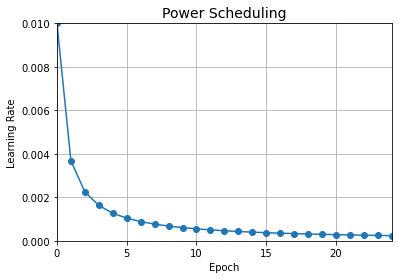

In [237]:
learning_rate = 0.01 # 초기 learning rate 가 0.01 이고
decay = 1e-4 # decay 가 1e-4 이며
batch_size = 32 # batchsize = 32 고
n_steps_per_epoch = 550000 // batch_size # len(X_train) = 550000 이고
n_epochs = 25 # epochs 가 25 인 경우에
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

#거듭제곱 스케일링의 learning rate 감소율
plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [238]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [239]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [240]:
history = model.fit(X_train_scaled, y_train, epochs=3,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/3
3000/3000 [==============================] - 0s 150us/sample - loss: 1.1061 - accuracy: 0.6510 - val_loss: 0.8121 - val_accuracy: 0.7410
Epoch 2/3
3000/3000 [==============================] - 0s 71us/sample - loss: 0.7205 - accuracy: 0.7560 - val_loss: 0.6937 - val_accuracy: 0.7810
Epoch 3/3
3000/3000 [==============================] - 0s 63us/sample - loss: 0.6299 - accuracy: 0.7840 - val_loss: 0.6293 - val_accuracy: 0.7970


## 지수 기반 스케줄링

```lr = lr0 * 0.1**(epoch / s)```

In [241]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [242]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [243]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [244]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 1s 289us/sample - loss: 1.3725 - accuracy: 0.6620 - val_loss: 0.6800 - val_accuracy: 0.7850
Epoch 2/25
3000/3000 [==============================] - 0s 124us/sample - loss: 0.6407 - accuracy: 0.7817 - val_loss: 0.8189 - val_accuracy: 0.6920
Epoch 3/25
3000/3000 [==============================] - 0s 116us/sample - loss: 0.4676 - accuracy: 0.8313 - val_loss: 0.6741 - val_accuracy: 0.7870
Epoch 4/25
3000/3000 [==============================] - 0s 121us/sample - loss: 0.4089 - accuracy: 0.8530 - val_loss: 0.6624 - val_accuracy: 0.8030
Epoch 5/25
3000/3000 [==============================] - 0s 107us/sample - loss: 0.3269 - accuracy: 0.8773 - val_loss: 0.5822 - val_accuracy: 0.8170
Epoch 6/25
3000/3000 [==============================] - 0s 109us/sample - loss: 0.2611 - accuracy: 0.9003 - val_loss: 0.6253 - val_accuracy: 0.8290
Epoch 7/25
3000/3000 [==============================] - 0s 118us

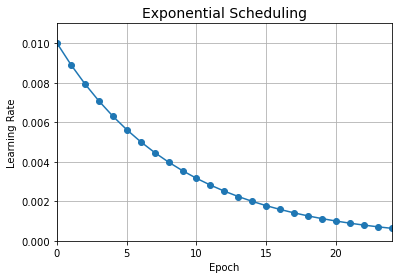

In [245]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

이 스케줄 함수는 두 번째 매개변수로 현재 학습률을 받을 수 있습니다:

In [246]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

에포크가 아니라 반복마다 학습률을 업데이트하려면 사용자 정의 콜백 클래스를 작성해야 합니다:

In [210]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # 노트: 에포크마다 `batch` 매개변수가 재설정됩니다
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # 20 에포크 동안 스텝 횟수 (배치 크기 = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 1s 297us/sample - loss: 1.3979 - accuracy: 0.6677 - val_loss: 0.6694 - val_accuracy: 0.7880
Epoch 2/25
3000/3000 [==============================] - 0s 121us/sample - loss: 0.6208 - accuracy: 0.7873 - val_loss: 0.9785 - val_accuracy: 0.6800
Epoch 3/25
3000/3000 [==============================] - 0s 117us/sample - loss: 0.5031 - accuracy: 0.8270 - val_loss: 0.6362 - val_accuracy: 0.8170
Epoch 4/25
3000/3000 [==============================] - 0s 112us/sample - loss: 0.3856 - accuracy: 0.8573 - val_loss: 0.6476 - val_accuracy: 0.8140
Epoch 5/25
3000/3000 [==============================] - 0s 131us/sample - loss: 0.3155 - accuracy: 0.8843 - val_loss: 0.6369 - val_accuracy: 0.8010
Epoch 6/25
3000/3000 [==============================] - 0s 116us/sample - loss: 0.2622 - accuracy: 0.9027 - val_loss: 0.6035 - val_accuracy: 0.8220
Epoch 7/25
3000/3000 [==============================] - 0s 117us

In [211]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

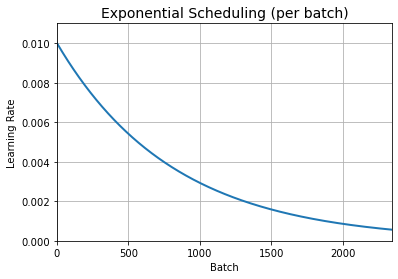

In [212]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

## 기간별 고정 스케줄링

In [247]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [248]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [249]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 1s 364us/sample - loss: 1.3831 - accuracy: 0.6627 - val_loss: 0.6578 - val_accuracy: 0.7900
Epoch 2/25
3000/3000 [==============================] - 0s 109us/sample - loss: 0.7200 - accuracy: 0.7553 - val_loss: 0.8767 - val_accuracy: 0.6830
Epoch 3/25
3000/3000 [==============================] - 0s 125us/sample - loss: 0.6028 - accuracy: 0.7990 - val_loss: 0.7415 - val_accuracy: 0.7800
Epoch 4/25
3000/3000 [==============================] - 0s 114us/sample - loss: 0.5311 - accuracy: 0.8260 - val_loss: 0.7809 - val_accuracy: 0.7560
Epoch 5/25
3000/3000 [==============================] - 0s 113us/sample - loss: 0.6014 - accuracy: 0.8113 - val_loss: 0.7881 - val_accuracy: 0.7520
Epoch 6/25
3000/3000 [==============================] - 0s 112us/sample - loss: 0.3079 - accuracy: 0.8860 - val_loss: 0.5951 - val_accuracy: 0.8310
Epoch 7/25
3000/3000 [==============================] - 0s 117us

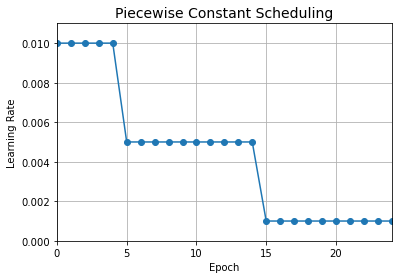

In [250]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## 성능 기반 스케줄링

In [251]:
tf.random.set_seed(42)
np.random.seed(42)

In [252]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
# 5번의 patience(반복) 동안 향상되지 않으면 학습률에 0.5를 곱한다.

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 0s 162us/sample - loss: 0.7707 - accuracy: 0.7320 - val_loss: 0.5461 - val_accuracy: 0.8230
Epoch 2/25
3000/3000 [==============================] - 0s 66us/sample - loss: 0.5235 - accuracy: 0.8173 - val_loss: 0.6303 - val_accuracy: 0.7740
Epoch 3/25
3000/3000 [==============================] - 0s 66us/sample - loss: 0.4490 - accuracy: 0.8377 - val_loss: 0.5016 - val_accuracy: 0.8370
Epoch 4/25
3000/3000 [==============================] - 0s 68us/sample - loss: 0.3737 - accuracy: 0.8670 - val_loss: 0.5628 - val_accuracy: 0.8200
Epoch 5/25
3000/3000 [==============================] - 0s 73us/sample - loss: 0.3641 - accuracy: 0.8720 - val_loss: 0.5119 - val_accuracy: 0.8310
Epoch 6/25
3000/3000 [==============================] - 0s 69us/sample - loss: 0.3368 - accuracy: 0.8830 - val_loss: 0.5722 - val_accuracy: 0.8310
Epoch 7/25
3000/3000 [==============================] - 0s 77us/sampl

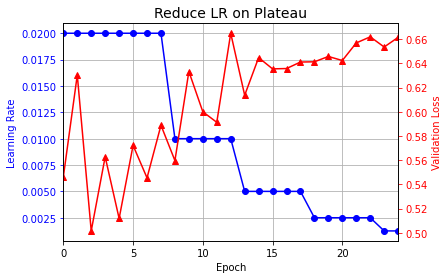

In [253]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

## tf.keras 스케줄러

In [254]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 0s 149us/sample - loss: 1.1036 - accuracy: 0.6573 - val_loss: 0.8209 - val_accuracy: 0.7480
Epoch 2/25
3000/3000 [==============================] - 0s 62us/sample - loss: 0.7395 - accuracy: 0.7603 - val_loss: 0.6989 - val_accuracy: 0.7830
Epoch 3/25
3000/3000 [==============================] - 0s 61us/sample - loss: 0.6508 - accuracy: 0.7820 - val_loss: 0.6408 - val_accuracy: 0.7930
Epoch 4/25
3000/3000 [==============================] - 0s 61us/sample - loss: 0.6046 - accuracy: 0.7977 - val_loss: 0.6157 - val_accuracy: 0.8010
Epoch 5/25
3000/3000 [==============================] - 0s 62us/sample - loss: 0.5750 - accuracy: 0.8130 - val_loss: 0.5928 - val_accuracy: 0.8060
Epoch 6/25
3000/3000 [==============================] - 0s 70us/sample - loss: 0.5531 - accuracy: 0.8190 - val_loss: 0.5768 - val_accuracy: 0.8110
Epoch 7/25
3000/3000 [==============================] - 0s 71us/sampl

구간별 고정 스케줄링은 다음을 사용하세요:

In [255]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])

## 1사이클 스케줄링

In [256]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [257]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

Train on 3000 samples
3000/3000 [==============================] - 0s 102us/sample - loss: 2316146.0508 - accuracy: 0.2490


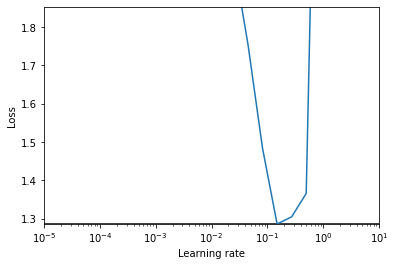

In [258]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [259]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [260]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Train on 3000 samples, validate on 1000 samples
Epoch 1/25
3000/3000 [==============================] - 0s 52us/sample - loss: 1.7861 - accuracy: 0.4013 - val_loss: 1.3240 - val_accuracy: 0.6100
Epoch 2/25
3000/3000 [==============================] - 0s 31us/sample - loss: 1.1462 - accuracy: 0.6600 - val_loss: 0.9980 - val_accuracy: 0.7120
Epoch 3/25
3000/3000 [==============================] - 0s 29us/sample - loss: 0.9099 - accuracy: 0.7137 - val_loss: 0.8440 - val_accuracy: 0.7410
Epoch 4/25
3000/3000 [==============================] - 0s 28us/sample - loss: 0.7843 - accuracy: 0.7437 - val_loss: 0.7580 - val_accuracy: 0.7690
Epoch 5/25
3000/3000 [==============================] - 0s 29us/sample - loss: 0.7038 - accuracy: 0.7663 - val_loss: 0.6957 - val_accuracy: 0.7820
Epoch 6/25
3000/3000 [==============================] - 0s 30us/sample - loss: 0.6462 - accuracy: 0.7850 - val_loss: 0.6455 - val_accuracy: 0.7920
Epoch 7/25
3000/3000 [==============================] - 0s 30us/sample

# 규제를 사용해 과대적합 피하기

## L1과 L2 규제

In [261]:
# l1 규제는 많은 연결을 0으로 만든다. 마치 lasso 처럼

In [262]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1 
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [263]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)), 
    #가중치 w 에 대해 l2 규제가 0.01 이 곱해진 후 들어간다.
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/2
3000/3000 [==============================] - 1s 340us/sample - loss: 6.1249 - accuracy: 0.7300 - val_loss: 3.6329 - val_accuracy: 0.8130
Epoch 2/2
3000/3000 [==============================] - 0s 132us/sample - loss: 2.5630 - accuracy: 0.8033 - val_loss: 1.8545 - val_accuracy: 0.7830


In [264]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/2
3000/3000 [==============================] - 1s 418us/sample - loss: 6.1773 - accuracy: 0.7263 - val_loss: 3.7079 - val_accuracy: 0.8070
Epoch 2/2
3000/3000 [==============================] - 0s 130us/sample - loss: 2.6186 - accuracy: 0.8033 - val_loss: 1.9041 - val_accuracy: 0.7850


## 드롭아웃

In [265]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/2
3000/3000 [==============================] - 1s 333us/sample - loss: 0.8582 - accuracy: 0.6943 - val_loss: 0.5637 - val_accuracy: 0.8090
Epoch 2/2
3000/3000 [==============================] - 0s 137us/sample - loss: 0.5891 - accuracy: 0.7987 - val_loss: 0.5779 - val_accuracy: 0.7950


## 알파 드롭아웃

In [266]:
tf.random.set_seed(42)
np.random.seed(42)

In [271]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 3
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/3
3000/3000 [==============================] - 1s 224us/sample - loss: 1.7262 - accuracy: 0.3863 - val_loss: 1.0407 - val_accuracy: 0.7100
Epoch 2/3
3000/3000 [==============================] - 0s 97us/sample - loss: 1.1510 - accuracy: 0.5670 - val_loss: 0.9109 - val_accuracy: 0.7480
Epoch 3/3
3000/3000 [==============================] - 0s 100us/sample - loss: 1.0511 - accuracy: 0.6127 - val_loss: 0.9423 - val_accuracy: 0.7380


In [272]:
model.evaluate(X_test_scaled, y_test)

500/500 [==============================] - 0s 40us/sample - loss: 0.8321 - accuracy: 0.7400


[0.8320814914703369, 0.74]

In [273]:
model.evaluate(X_train_scaled, y_train)

3000/3000 [==============================] - 0s 31us/sample - loss: 0.9059 - accuracy: 0.7283


[0.9059246799945831, 0.72833335]

In [274]:
history = model.fit(X_train_scaled, y_train)

Train on 3000 samples
3000/3000 [==============================] - 0s 76us/sample - loss: 0.9842 - accuracy: 0.6413


## MC 드롭아웃

In [275]:
tf.random.set_seed(42)
np.random.seed(42)

In [276]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



In [277]:
np.round(model.predict(X_test_scaled[:1]), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.38, 0.  , 0.6 ]],
      dtype=float32)

In [278]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.32, 0.  , 0.41]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.34, 0.  , 0.16]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.78, 0.  , 0.05]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.48, 0.  , 0.48]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.06, 0.04, 0.77]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.56, 0.  , 0.35]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.3 , 0.29, 0.38]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.13, 0.  , 0.78]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.16, 0.  , 0.14]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.44, 0.14, 0.38]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.16, 0.05, 0.71]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.47, 0.09, 0.2 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.  , 0.7 , 0.02, 0.12]],

       [[0.  , 0.  , 0.01, 0.  , 0.  , 0.4 , 0.  , 0.24, 0.15, 0

In [279]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.19, 0.  , 0.36, 0.07, 0.38]],
      dtype=float32)

In [280]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.16, 0.01, 0.26, 0.14, 0.27]],
      dtype=float32)

In [281]:
y_pred = np.argmax(y_proba, axis=1)

In [282]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.742

In [283]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [284]:
tf.random.set_seed(42)
np.random.seed(42)

In [285]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [286]:
mc_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
mc_alpha_dropout (MCAlphaDro (None, 784)               0         
_________________________________________________________________
dense_381 (Dense)            (None, 300)               235500    
_________________________________________________________________
mc_alpha_dropout_1 (MCAlphaD (None, 300)               0         
_________________________________________________________________
dense_382 (Dense)            (None, 100)               30100     
_________________________________________________________________
mc_alpha_dropout_2 (MCAlphaD (None, 100)               0         
_________________________________________________________________
dense_383 (Dense)            (None, 10)              

In [287]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [288]:
mc_model.set_weights(model.get_weights())

이제 MC 드롭아웃을 모델에 사용할 수 있습니다:

In [289]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.21, 0.  , 0.39, 0.06, 0.33]],
      dtype=float32)

## 맥스 노름

In [290]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [291]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Train on 3000 samples, validate on 1000 samples
Epoch 1/2
3000/3000 [==============================] - 1s 320us/sample - loss: 0.7361 - accuracy: 0.7360 - val_loss: 0.5435 - val_accuracy: 0.8190
Epoch 2/2
3000/3000 [==============================] - 0s 120us/sample - loss: 0.4888 - accuracy: 0.8340 - val_loss: 0.6623 - val_accuracy: 0.7540
